# Project 3: Classification Models

## Part 1: PROJECT DESCRIPTION

"A balanced and complete dataset is not necessarily good to use. There are still few important points to be taken care of before we create our ML classification learning model. For example, even if the dataset is preprocessed, if we don’t know what features are useful, the model we create won’t make much sense.

Your task is to find features that you think will be useful for your model in answering the question: What is the target class of the given observation? This question judges your ability to differentiate and find the features useful for the questions you are answering"

___
For this project, I am using the dataset as posted on Canvas, and as directed by this assignment.

"Churn_modeling" has many fields (`RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited`), where most of the fields could conceivably provide some predictive power. For example, a field like `Surname` seems to have no relationship with churning, but last names can correlate with race, which could correlate with household income level. For another example, for `gender`, differences in spending habits could extend to subscription churn.

Fields that we can for sure remove `RowNumber`, `CustomerId`, and `Surname`. Even though we could come up a reason why `Surname` could have predictive power, its predictive power is likely minimal and redundant with the `EstimatedSalary` field.
___




In [ ]:
import pandas as pd

data = pd.read_csv('./Churn_Modelling.csv')
data.columns = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Dropping RowNumber, CustomerId, Surname
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Part 2

"A good train and test split is always useful. Duplicates in training and test set should be avoided. Any ML model that trains on a training set which helps explain a lot of variance in the data tend to yield higher accuracy on test set. The task of this part is simple: Find a train-test split ratio (for example 80:20) that you think will be best for your ML model to be trained and tested on."

To find the best train-test split we picked one of the models we had, Naive Bayes, and tested a range of train-test splits. The reasoning behind choosing Naive Bayes was the fact that it had shortest train time amongst our models and was prefered by team to be tested with around 20 train-test splits to find the most proper for this dataset. Our team tested the model with train-test splits from 70-30 to 90-10. Highest accuracy was achieved with 78-22 train-test split; hence the team decided to use 22% as the test size. Please refer to the Naive Bayes section for brief additional detail.

In [ ]:
from sklearn.model_selection import train_test_split
x = data[data.columns[:-1]] # All columns but `Exited` - excluding last column
y = data[data.columns[-1:]] # `Exited` - selecting only the last column
print(x.columns)
print(y.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=0)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Exited'], dtype='object')


## Part 3

"Practically, multiple different models are trained simultaneously (sometimes on different systems) and then compared. The model that explains the dataset the best and that yields the highest accuracy is generally chosen. Your task is to calculate accuracy of all the models you create and tabulate it."

| ML Model       | Accuracy on test |
|:---------------|-----------------:|
| Naive Bayes    | 0.788181 |
| KNN            | 0.828974 |
| SVM            | 0.799545 |
| DT             | 0.844545 |
| Log Regression | 0.791364 |

### Naive Bayes

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Naive Bayes needs categorical columns to be converted to integers
# We do this using the get_dummies method that splits it into multiple boolean columns
nb_x = pd.get_dummies(x,columns=['Geography', 'Gender'],drop_first=True)
# nb_x = x
print(nb_x.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [ ]:
max_accuracy = 0
best_test_size = 0

for i in range (0, 21):
  test_aloc = 0.1+i*0.01
  # Create a train/test split using nb_x and y (the Exited column)
  nb_x_train, nb_x_test, nb_y_train, nb_y_test = train_test_split(nb_x, y, test_size=test_aloc, random_state=0)

  # Build a Gaussian Classifier
  nb_model = GaussianNB()

  # Model training
  # np.ravel is used to flatten the array to fit the GaussianNB model
  nb_model.fit(nb_x_train, np.ravel(nb_y_train))

  nb_y_pred = nb_model.predict(nb_x_test)

  # Call the accuracy_score method to check the accuracy of the model
  accuray = accuracy_score(nb_y_pred, nb_y_test) * 100

  if accuray > max_accuracy:
        max_accuracy = accuray
        best_test_size = test_aloc

  print('Accuracy on test data is %.2f%% for test size %.2f%%' % (accuray, test_aloc))
nb_x_train, nb_x_test, nb_y_train, nb_y_test = train_test_split(nb_x, y, test_size=best_test_size, random_state=0) # This is were we set the train and test split for this section (provided dataset)
print("Best accuracy of %.2f%% for test size %.2f%%" % (max_accuracy, best_test_size))

Accuracy on test data is 77.90% for test size 0.10%
Accuracy on test data is 77.73% for test size 0.11%
Accuracy on test data is 77.17% for test size 0.12%
Accuracy on test data is 77.85% for test size 0.13%
Accuracy on test data is 77.94% for test size 0.14%
Accuracy on test data is 78.15% for test size 0.15%
Accuracy on test data is 77.88% for test size 0.16%
Accuracy on test data is 78.13% for test size 0.17%
Accuracy on test data is 78.28% for test size 0.18%
Accuracy on test data is 78.32% for test size 0.19%
Accuracy on test data is 78.50% for test size 0.20%
Accuracy on test data is 78.76% for test size 0.21%
Accuracy on test data is 78.82% for test size 0.22%
Accuracy on test data is 78.74% for test size 0.23%
Accuracy on test data is 78.67% for test size 0.24%
Accuracy on test data is 78.36% for test size 0.25%
Accuracy on test data is 78.19% for test size 0.26%
Accuracy on test data is 78.19% for test size 0.27%
Accuracy on test data is 78.04% for test size 0.28%
Accuracy on 

### KNN

loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10
loop 11
loop 12
loop 13
loop 14
loop 15
loop 16
loop 17
loop 18
loop 19
loop 20
loop 21
loop 22
loop 23
loop 24
loop 25
loop 26
loop 27
loop 28
loop 29
loop 30
Max K is 13 with a score of 0.828974358974359
This results in an accuracy of 82.90%


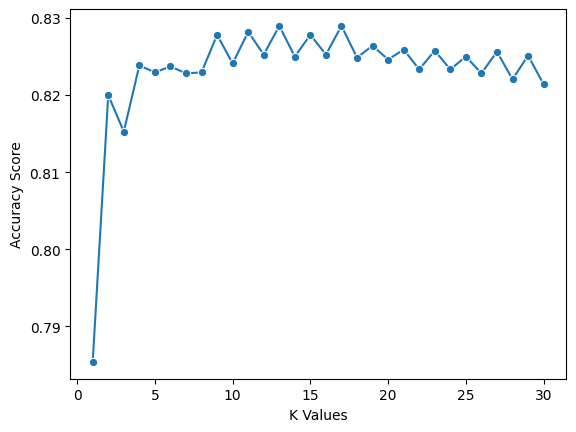

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#Define k_values as the range of neighbors "k" to determine the most accurate
k_values = [i for i in range (1,31)]
scores = []

# For KNN, we use StandardScaler to scale the features
scaler = StandardScaler()
# Transformation also requires only integers
# Luckily we already performed this with Naive Bayes analysis
knn_x_train = scaler.fit_transform(nb_x_train)

# Track the number of neighbors with the highest score
max_k = 0
max_score = 0

# Loop through each k value
for k in k_values:
    print(f'loop {k}')
    # Call the KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # This method is used to calculate the "score"
    score = cross_val_score(knn, knn_x_train, np.ravel(nb_y_train), cv=5)
    scores.append(np.mean(score))
    # Update the highest score if needed
    if(np.mean(score) > max_score):
       max_k = k
       max_score = np.mean(score)

# Plot the values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

print('Max K is ' + str(max_k) + ' with a score of ' + str(max_score))
print('This results in an accuracy of %.2f%%' % (max_score * 100))

### SVM

loop 0.01
loop 0.1
loop 0.2
loop 0.5
loop 0.8
loop 1
loop 5
loop 10
loop 20
loop 50


Text(0, 0.5, 'Accuracy')

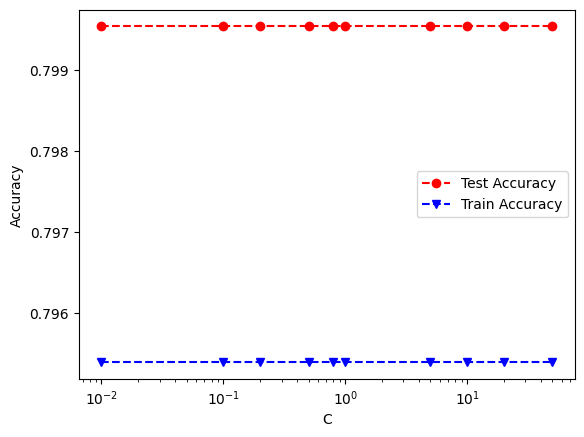

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt


# Nonlinear SVM
C_values = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVML_test_acc = []
SVML_train_acc = []


for param in C_values:
    print(f"loop {param}")
    clf = SVC(C=param, kernel="rbf")
    clf.fit(nb_x_train, nb_y_train.values.ravel())
    svml_pred = clf.predict(nb_x_test)
    svml_pred_train = clf.predict(nb_x_train)
    SVML_test_acc.append(accuracy_score(nb_y_test, svml_pred))
    SVML_train_acc.append(accuracy_score(nb_y_train, svml_pred_train))

plt.plot(C_values, SVML_test_acc, "ro--", C_values, SVML_train_acc, "bv--")
plt.legend(["Test Accuracy", "Train Accuracy"])
plt.xlabel("C")
plt.xscale("log")
plt.ylabel("Accuracy")

In [ ]:
print(f'Accuracy: {max(SVML_test_acc)}')

Accuracy: 0.7995454545454546


### DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing

# clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(nb_x_train, y_train)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


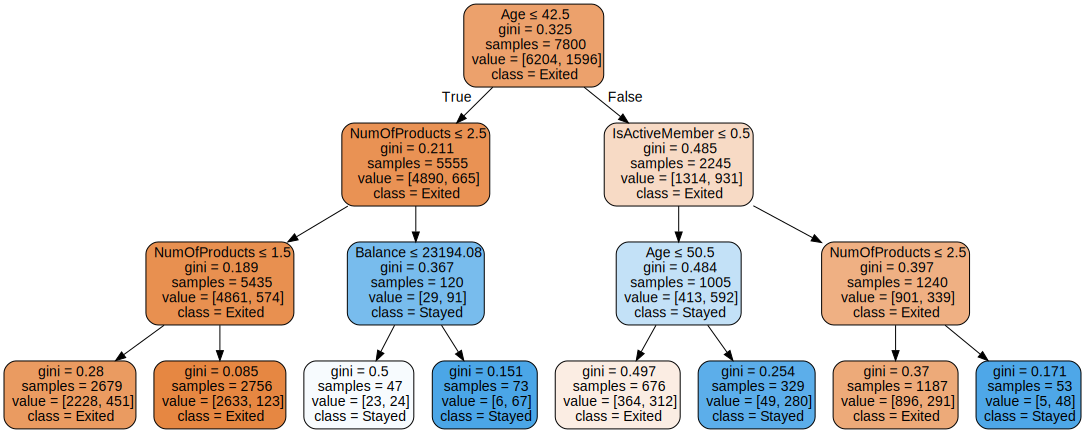

In [ ]:
from sklearn import tree
import graphviz

print(nb_x_train.columns)
feature_names = nb_x_train.columns.tolist()
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=["Exited", "Stayed"],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# Prediction accuracy

y_pred = clf.predict(nb_x_test)
print(f"Prediction Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

predictions = pd.concat([y_test, pd.Series(y_pred, name='Predicted')], axis=1)
predictions = predictions.dropna()
predictions

Prediction Accuracy: 84.45%


,Exited,Predicted
898,1.0,0.0
1087,0.0,0.0
1819,0.0,0.0
382,0.0,0.0
580,0.0,1.0
...,...,...
1364,0.0,0.0
1691,0.0,0.0
2161,0.0,0.0
20,0.0,0.0


### Logistic Regression

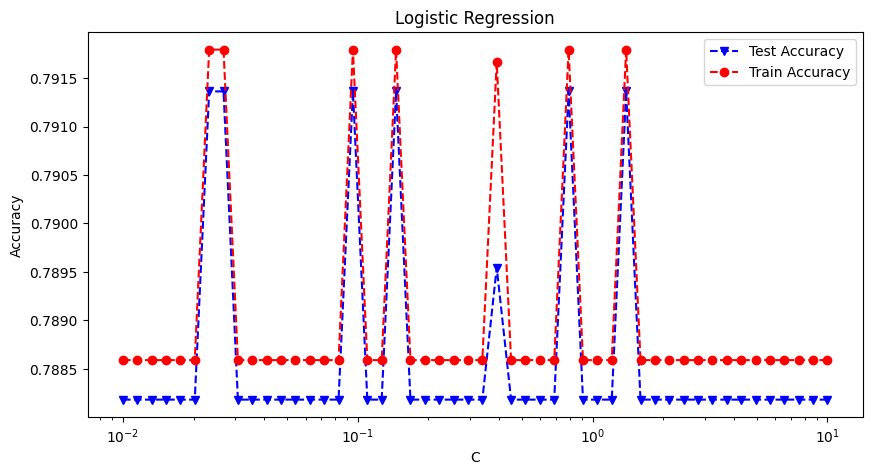

,Accuracy
0.023300,0.791364
0.026827,0.791364
0.095410,0.791364


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#C is strength of regularization
# C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
C = np.logspace(start=-2, stop=1, base=10)

#Store scores
LRtestAcc = []
LRtrainAcc = []
df = pd.DataFrame

#Since dataset is on the smaller side use liblinear instead of default solver which is for large datasets
#random_state set to 0 takes away slight randomness each time
for param in C:
    # print(f'loop {param}')
    clf = LogisticRegression(C=param, solver='liblinear', random_state=0)
    # clf = LogisticRegression(C=param, random_state=0)

    clf.fit(nb_x_train, nb_y_train.values.ravel()) #have to convert geography and gender into numerical
    log_reg_pred = clf.predict(nb_x_test)
    log_reg_pred_train = clf.predict(nb_x_train)
    # print(log_reg_pred)
    LRtestAcc.append(accuracy_score(nb_y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(nb_y_train, log_reg_pred_train))

plt.figure(figsize=(10, 5))
plt.plot(C, LRtestAcc, 'bv--', C, LRtrainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.show()

df = pd.DataFrame({'Accuracy': LRtestAcc})
df.index = C
df.nlargest(3, 'Accuracy')
# print(df.columns)

### Summary

Out of all these models, the KNN model is the best performing out of the selection. Both the SVM and DT models do produce accuracies near 80%, the KNN model produces a test accuracy of 82%, which is the most accurate from all models. This is because the KNN grabs the highest value from an array of mean values, which in turn provide the best average and accurate accuracy when classifying a dataset

# Classification using Our Dataset

## Part 1

In data preprocessing, we removed and combined several features such that the remaining features should all be useful data for training the classification models. The use for removing these features is to reduce our data's chances of overfitting, overcomplexity, and inclusion of redundent/repetitive and or irrelevant data.

In [ ]:
import pandas as pd

laqn_data = pd.read_csv('./LaqnData-cleaned-ready-for-X-Y-not-normalized.csv')
laqn_data

,Value,Species,day,month
0,16.558333,0,0.000000,0.0
1,44.545833,3,0.000000,0.0
2,34.930000,2,0.000000,0.0
3,39.550000,1,0.000000,0.0
4,6.400000,0,0.033333,0.0
...,...,...,...,...
1379,17.966667,3,0.633333,1.0
1380,48.350000,2,0.666667,1.0
1381,29.150000,1,0.666667,1.0
1382,12.516667,0,0.666667,1.0


## Part 2
Like before, we performed a similar test with the same reasonings on Naive Bayes and found out that this time most proper train-test split is 79-21. So we will allocate 21% to test set.


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming laqn_data is your DataFrame
x = laqn_data[['Value', 'day', 'month']]   # Use double brackets for multiple columns
y = laqn_data['Species']                   # Use single bracket for a single column to get a Series

print(x.columns)
print(y.name)    # Since y is a Series, use .name to get the name of the series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.21, random_state=0) # This is were we set the train and test split for this section (our team's dataset)


Index(['Value', 'day', 'month'], dtype='object')
Species


## Part 3

| ML Model       | Accuracy on test |
|:---------------|-----------------:|
| Naive Bayes    | 0.4261 |
| KNN            | 0.4556 |
| SVM            | 0.4134 |
| DT             | 0.4183 |
| Log Regression | 0.4038 |

### Naive Bayes

We are training a Naive Bayes classifier on the training data, makes predictions on the test data, calculates the accuracy of the predictions, and prints the accuracy score.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

max_accuracy = 0
best_test_size = 0

for i in range (0, 21):
  test_aloc = 0.1+i*0.01

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_aloc, random_state=0)

  # Build a Gaussian Classifier
  nb_model = GaussianNB()

  # Model training
  # np.ravel is used to flatten the array to fit the GaussianNB model
  nb_model.fit(x_train, np.ravel(y_train))

  y_pred = nb_model.predict(x_test)

  # Call the accuracy_score method to check the accuracy of the model
  accuracy = accuracy_score(y_pred, y_test) * 100

  #print('Accuracy on test data is %.2f%%' % accuracy)
  if accuracy > max_accuracy:
      max_accuracy = accuracy
      best_test_size = test_aloc

  print('Accuracy on test data is %.2f%% for test size %.2f%%' % (accuracy, test_aloc))
print("Best accuracy of %.2f%% for test size %.2f%%" % (max_accuracy, best_test_size))

Accuracy on test data is 41.73% for test size 0.10%
Accuracy on test data is 40.52% for test size 0.11%
Accuracy on test data is 40.72% for test size 0.12%
Accuracy on test data is 41.67% for test size 0.13%
Accuracy on test data is 40.72% for test size 0.14%
Accuracy on test data is 40.38% for test size 0.15%
Accuracy on test data is 39.19% for test size 0.16%
Accuracy on test data is 40.25% for test size 0.17%
Accuracy on test data is 40.40% for test size 0.18%
Accuracy on test data is 41.83% for test size 0.19%
Accuracy on test data is 41.88% for test size 0.20%
Accuracy on test data is 42.61% for test size 0.21%
Accuracy on test data is 40.98% for test size 0.22%
Accuracy on test data is 39.50% for test size 0.23%
Accuracy on test data is 39.94% for test size 0.24%
Accuracy on test data is 40.17% for test size 0.25%
Accuracy on test data is 39.72% for test size 0.26%
Accuracy on test data is 39.30% for test size 0.27%
Accuracy on test data is 40.46% for test size 0.28%
Accuracy on 

### KNN

We are iterating through different numbers of neighbors for the KNN algorithm, evaluates their performance using cross-validation, and plots the results to determine the optimal "k" value for the highest accuracy in classification.


loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10
loop 11
loop 12
loop 13
loop 14
loop 15
loop 16
loop 17
loop 18
loop 19
loop 20
loop 21
loop 22
loop 23
loop 24
loop 25
loop 26
loop 27
loop 28
loop 29
loop 30
Max K is 21 with a score of 0.4555632711927782
This results in an accuracy of 45.56%


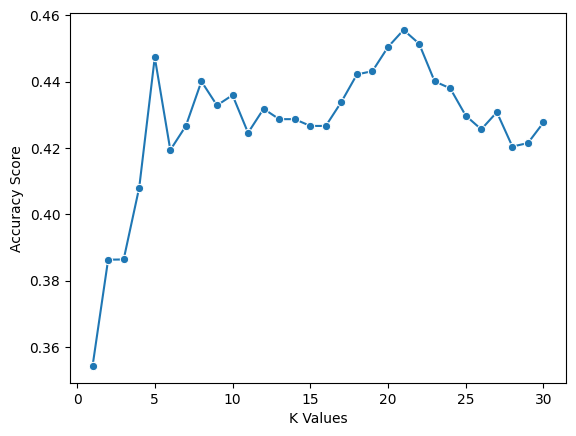

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#Define k_values as the range of neighbors "k" to determine the most accurate
k_values = [i for i in range (1,31)]
scores = []

# For KNN, we use StandardScaler to scale the features
scaler = StandardScaler()
# Transformation also requires only integers
# Luckily we already performed this with Naive Bayes analysis
knn_x_train = scaler.fit_transform(x_train)

# Track the number of neighbors with the highest score
max_k = 0
max_score = 0

# Loop through each k value
for k in k_values:
    print(f'loop {k}')
    # Call the KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # This method is used to calculate the "score"
    score = cross_val_score(knn, knn_x_train, np.ravel(y_train), cv=5)
    scores.append(np.mean(score))
    # Update the highest score if needed
    if(np.mean(score) > max_score):
       max_k = k
       max_score = np.mean(score)

# Plot the values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

print('Max K is ' + str(max_k) + ' with a score of ' + str(max_score))
print('This results in an accuracy of %.2f%%' % (max_score * 100))

### SVM

We are training SVM classifiers with RBF kernels and different regularization strengths, plots the test and train accuracies against these strengths, and visualizes the impact of regularization on the classifier's performance.







loop 0.01
loop 0.011513953993264476
loop 0.013257113655901088
loop 0.015264179671752335
loop 0.017575106248547922
loop 0.020235896477251575
loop 0.02329951810515372
loop 0.026826957952797256
loop 0.030888435964774818
loop 0.03556480306223129
loop 0.040949150623804255
loop 0.04714866363457395
loop 0.05428675439323859
loop 0.06250551925273973
loop 0.07196856730011521
loop 0.08286427728546843
loop 0.0954095476349994
loop 0.10985411419875583
loop 0.12648552168552957
loop 0.14563484775012436
loop 0.16768329368110083
loop 0.19306977288832494
loop 0.22229964825261944
loop 0.2559547922699536
loop 0.29470517025518095
loop 0.3393221771895328
loop 0.39069399370546165
loop 0.44984326689694465
loop 0.517947467923121
loop 0.5963623316594643
loop 0.6866488450043001
loop 0.7906043210907697
loop 0.9102981779915217
loop 1.0481131341546852
loop 1.2067926406393288
loop 1.3894954943731375
loop 1.5998587196060572
loop 1.8420699693267164
loop 2.1209508879201904
loop 2.44205309454865
loop 2.8117686979742307
l

Text(0, 0.5, 'Accuracy')

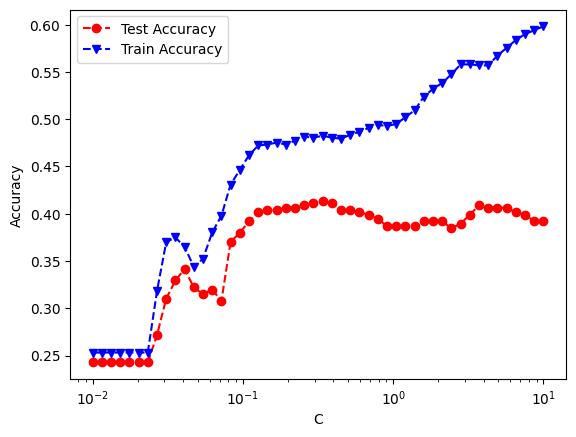

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt


# Nonlinear SVM
# C_values = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
C_values = np.logspace(start=-2, stop=1, base=10)

SVML_test_acc = []
SVML_train_acc = []


for param in C_values:
    print(f"loop {param}")
    clf = SVC(C=param, kernel="rbf", gamma='auto')
    clf.fit(x_train, y_train.values.ravel())
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(x_train)
    SVML_test_acc.append(accuracy_score(y_test, svml_pred))
    SVML_train_acc.append(accuracy_score(y_train, svml_pred_train))

plt.plot(C_values, SVML_test_acc, "ro--", C_values, SVML_train_acc, "bv--")
plt.legend(["Test Accuracy", "Train Accuracy"])
plt.xlabel("C")
plt.xscale("log")
plt.ylabel("Accuracy")

In [ ]:
print(max(SVML_test_acc))

0.41346153846153844


### DT

In this part we are essentially training a Decision Tree classifier, which extracts feature names, generates a visualization of the decision tree, and displays it. The decision tree helps visualize how the classifier makes decisions based on the input features.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing

# clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(x_train, y_train)

Index(['Value', 'day', 'month'], dtype='object')


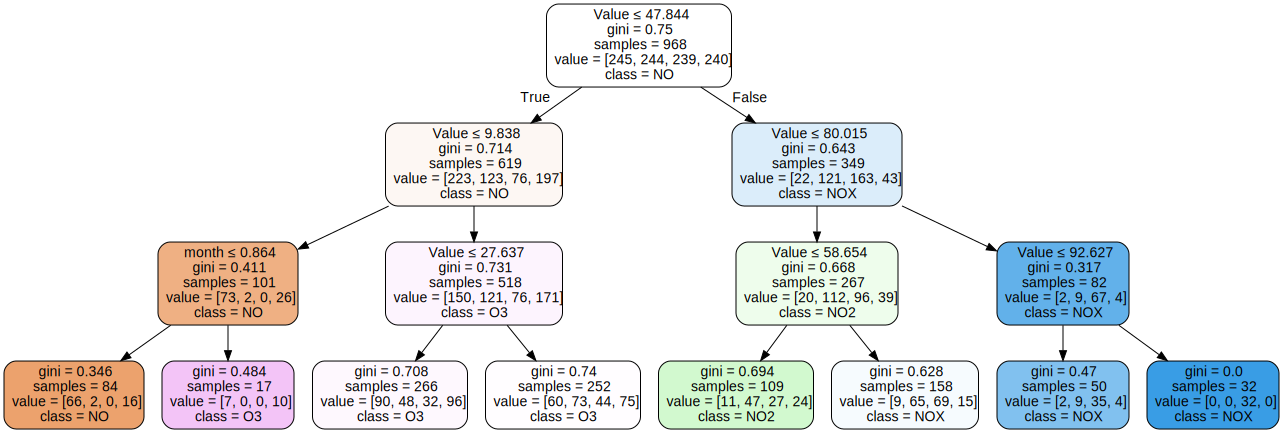

In [ ]:
from sklearn import tree
import graphviz

print(x_train.columns)
feature_names = x_train.columns.tolist()
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=["NO", "NO2", "NOX", "O3"],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# Prediction accuracy

y_pred = clf.predict(x_test)
print(f"Prediction Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

predictions = pd.concat([y_test, pd.Series(y_pred, name='Predicted')], axis=1)
predictions = predictions.dropna()
predictions.head()

Prediction Accuracy: 41.83%


,Species,Predicted
253,2.0,1.0
268,1.0,3.0
298,3.0,3.0
279,0.0,3.0
303,2.0,3.0


### Logistic Regression

We are performing logistic regression with varying regularization strengths, plot the test and train accuracies against these strengths, and identifies the top 3 test accuracies.


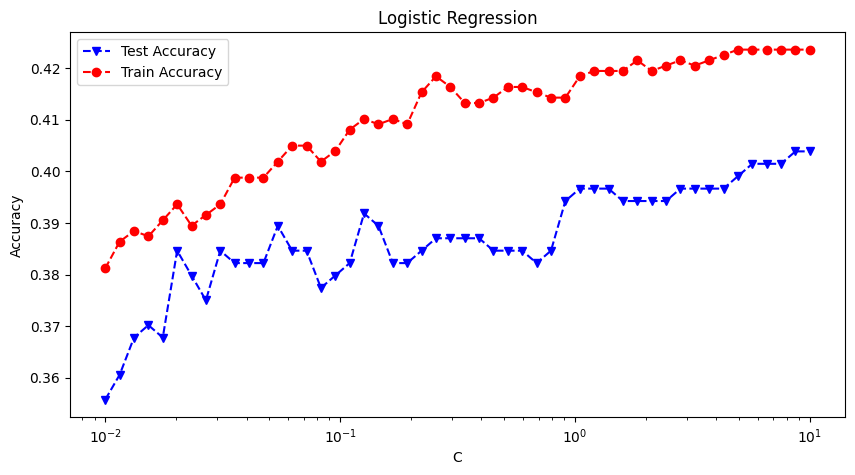

,Accuracy
8.685114,0.403846
10.000000,0.403846
5.689866,0.401442


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#C is strength of regularization
# C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
C = np.logspace(start=-2, stop=1, base=10)

#Store scores
LRtestAcc = []
LRtrainAcc = []
df = pd.DataFrame

#Since dataset is on the smaller side use liblinear instead of default solver which is for large datasets
#random_state set to 0 takes away slight randomness each time
for param in C:
    # print(f'loop {param}')
    clf = LogisticRegression(C=param, solver='liblinear', random_state=0)
    # clf = LogisticRegression(C=param, random_state=0)

    clf.fit(x_train, y_train.values.ravel()) #have to convert geography and gender into numerical
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x_train)
    # print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train, log_reg_pred_train))

plt.figure(figsize=(10, 5))
plt.plot(C, LRtestAcc, 'bv--', C, LRtrainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.show()

df = pd.DataFrame({'Accuracy': LRtestAcc})
df.index = C
df.nlargest(3, 'Accuracy')
# print(df.columns)

### Summary

Out of all these models, the KNN model is the better performing model out of the selections. Both the KNN and DT models do produce accuracies near 40%, however the KNN model produces a test accuracy near 45%, which is the most accurate from all models. This is because the KNN grabs the highest value from an array of mean values, which in turn provide the best average and accurate accuracy when classifying a dataset